<a href="https://colab.research.google.com/github/Nehach73/DS3001/blob/main/linear_reg_assignment/linear_reg_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented







In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

In [8]:
df['Neighbourhood'] = df['Neighbourhood ']
df.loc[:,['Price', 'Review Scores Rating', 'Neighbourhood']].groupby('Neighbourhood').describe()

Price                                                      \
                 count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                
Bronx            217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn        8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan      11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens          1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island     96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                       Review Scores Rating                                   \
                   max                count       mean       std   min   25%   
Neighbourhood                                                                  
Bronx            244.0                217.0  91.654378  8.169239  60.0  88.0   
Brooklyn        4500.0               8487.0  92.363497  8.656563  20.0  90.0   
Manhattan      10000.0              11763.0  91.801496  8.840889  20.0  88.0   
Queens           950.0               1590.0  91.549057  9.895860  20.0  88.0   
Staten Island   5000.0                 96.0  90.843750  9.137923  40.0  87.0   

                                   
                50%    75%    max  
Neighbourhood                      
Bronx          93.0   99.0  100.0  
Brooklyn       94.0  100.0  100.0  
Manhattan      93.0   99.0  100.0  
Queens         94.0  100.0  100.0  
Staten Island  92.0   97.0  100.0

<Axes: xlabel='Price', ylabel='Density'>

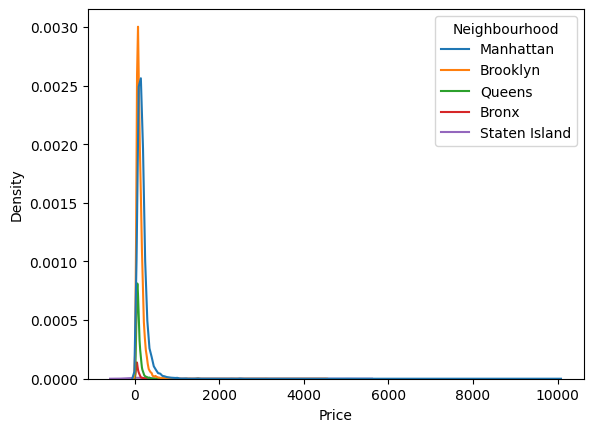

In [10]:
# Kernel density plot of price by neighborhood
sns.kdeplot(data = df,x = 'Price', hue = df['Neighbourhood'])

<Axes: xlabel='Price', ylabel='Density'>

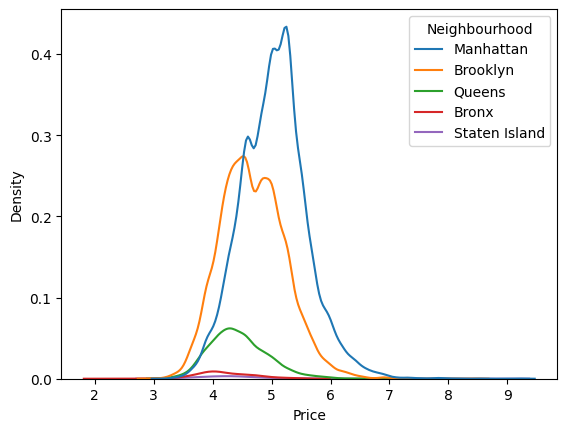

In [12]:
#Kernel density plot of log price by neighborhood
sns.kdeplot(data = df,x = np.log(df['Price']), hue = df['Neighbourhood'])

Manhattan is the most expensive borough on average.


2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [17]:
from sklearn.linear_model import LinearRegression

y = df['Price']
x = pd.get_dummies(df['Neighbourhood'], dtype = 'int')

reg = LinearRegression(fit_intercept=False).fit(x, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


The coefficients mirror the mean prices grouped by neighborhood.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [19]:
y = df['Price']
x = pd.get_dummies(df['Neighbourhood'], dtype = 'int', drop_first=True)

reg = LinearRegression(fit_intercept=True).fit(x, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [20]:
print(reg.intercept_)

75.27649769585331


The regression dropped the Bronx and made its old coefficient the intercept of the regression. To get the part 2 coefficients from the new ones, you have to add the intercept to each coefficient.

4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [24]:
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


The most expensive kind of property you can rent is an apartment with the highest rating (100) in Manhattan.

In [25]:
# cost = rating*rating_coefficient + Manhattan_coefficient
cost = 100*1.032257 + 89.421020
cost

192.64672000000002

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [50]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood', 'Property Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood'], dtype='int'), pd.get_dummies(X_train['Property Type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood'], dtype='int'), pd.get_dummies(X_test['Property Type'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression().fit(Z_train,y_train)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Review Scores Rating,1.015839
1,Bronx,-55.227165
2,Brooklyn,1.688197
3,Manhattan,64.195472
4,Queens,-27.927822
5,Staten Island,17.271318
6,Apartment,-10.601413
7,Bed & Breakfast,-41.933145
8,Boat,56.348564
9,Bungalow,43.155859


In [51]:
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Hut
Feature names seen at fit time, yet now missing:
- Bungalow
- Cabin
- Castle
- Chalet
- Lighthouse


The most expensive property to rent is a 100 rated Condominium in Manhattan.

In [52]:
# cost = rating*rating_coefficient + Manhattan_coefficient + Condo_coefficient
cost = 100*1.0158 + 64.1955 + 84.2412
cost

250.01670000000001

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

The coefficient on Review Scores Rating decreases as we add another variable to the regression because adding another predictive variable generates more noise/variability and reduces the predictive ability of the other variables included in the model.


7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.






In [75]:
df = pd.read_csv('/content/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


<Axes: >

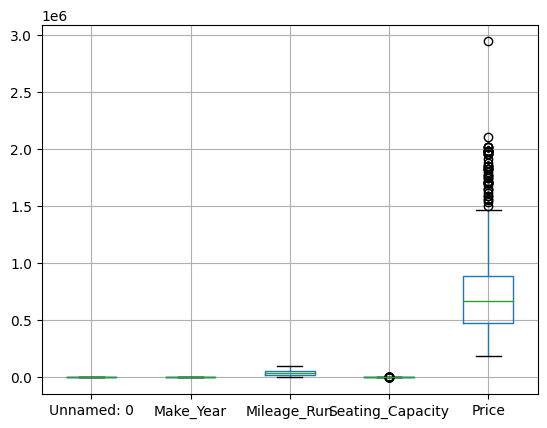

In [76]:
df.boxplot()

<Axes: >

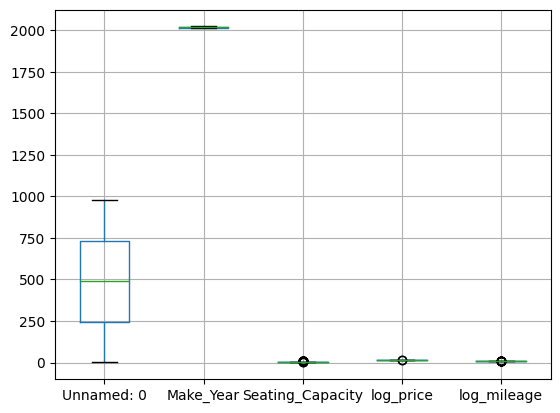

In [78]:
# transforming price and mileage
dft = df
dft['log_price'] = np.log(df['Price'])
dft['log_mileage'] = np.log(df['Mileage_Run'])
dft = df.drop(['Price', 'Mileage_Run'], axis = 1)
dft.boxplot()

<Axes: >

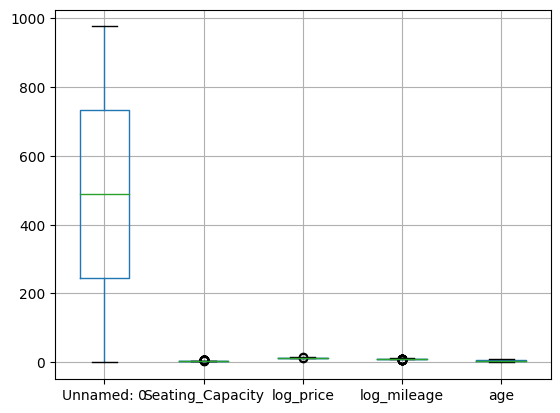

In [79]:
# transforming make_year to age
dft['age'] = max(df['Make_Year'])-df['Make_Year']
dft = dft.drop(['Make_Year'], axis = 1)
dft.boxplot()

<Axes: >

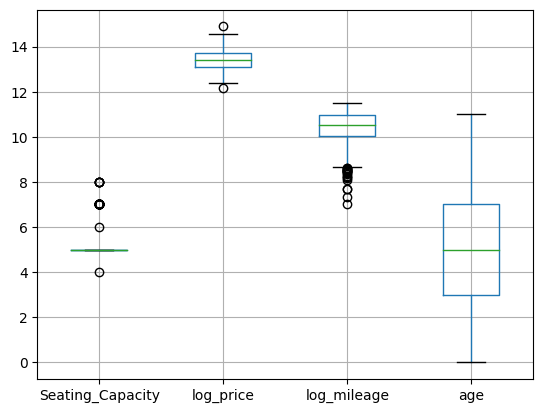

In [80]:
dft = dft.drop(['Unnamed: 0'], axis = 1)
dft.boxplot()

  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

In [81]:
df.loc[:,['Price', 'Make']].groupby('Make').describe()

Price                                                    \
               count          mean           std        min        25%   
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.148273e+05   287000.0   475000.0   
Skoda            5.0  1.136000e+06  1.070175e+06   436000.0   466000.0   
Tata            23.0  1.055217e+06  5.578305e+05   188000.0   779500.0   
Toyota          50.0  8.003400e+05  2.466900e+05   368000.0   526250.0   
Volkswagen      29.0  6.058276e+05  1.198312e+05   402000.0   542000.0   

                                                
                     50%        75%        max  
Make                                            
Chevrolet       345500.0   537500.0   892000.0  
Datsun          290000.0   295000.0   300000.0  
Ford            707500.0   787000.0  1066000.0  
Honda           785000.0   915000.0  1537000.0  
Hyundai         638000.0   837000.0  1742000.0  
Jeep           1529500.0  1581500.0  1649000.0  
Kia            1628500.0  1705750.0  1741000.0  
MG Motors      1848000.0  1978000.0  2019000.0  
Mahindra       1094500.0  1157000.0  1465000.0  
Maruti Suzuki   527000.0   764000.0  1163000.0  
Nissan          978000.0  1079750.0  1106000.0  
Renault         644000.0   801000.0  1164000.0  
Skoda           538000.0  1299000.0  2941000.0  
Tata            869000.0  1552000.0  2100000.0  
Toyota          894000.0  1023000.0  1092000.0  
Volkswagen      607000.0   699000.0   790000.0

<Axes: xlabel='log_price', ylabel='Density'>

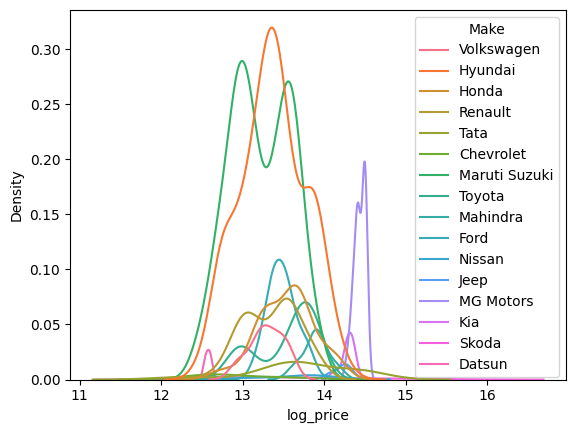

In [82]:
sns.kdeplot(data = dft,x = 'log_price', hue = dft['Make'])

MG motors makes the most expensive cars. Most other car brands' prices are normally distributed around the same price, but some brands, like Maruti Suzuki, Toyota, and Renault, have two peaks in their density distribution - indicating that they have more distinct price points within their vehicles than other brands.

  3. Split the data into an 80% training set and a 20% testing set.

In [83]:
N = df.shape[0]
df = df.sample(frac=1, random_state=100)
train_size = int(.8*N)

dft_train = dft[0:train_size]
dft_test = dft[train_size:]

y_train = dft_train['log_price']
y_test = dft_test['log_price']

  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

 5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.